In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
train_dir = '/content/drive/MyDrive/AI-ML/FruitinAmazon/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/AI-ML/FruitinAmazon/FruitinAmazon/test'

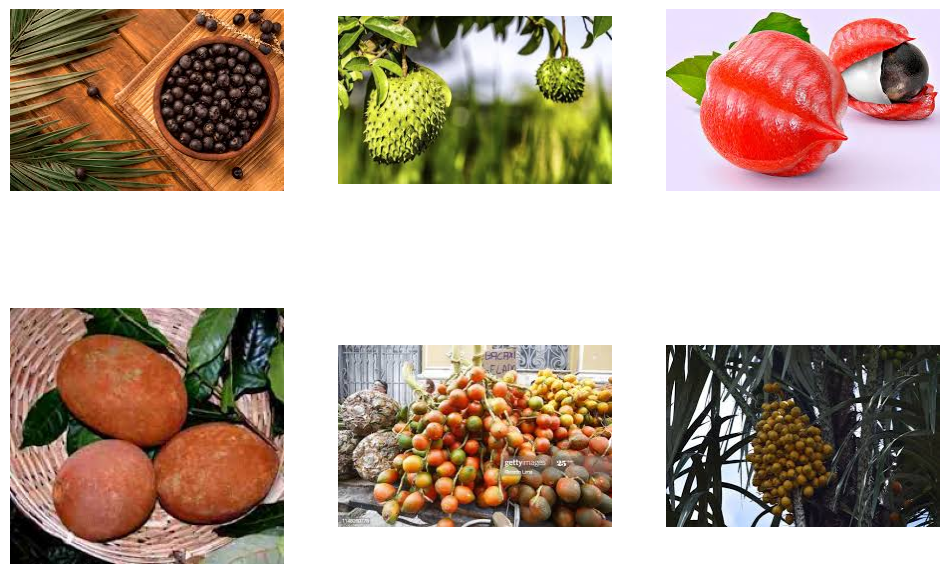

In [ ]:
 class_dirs = os.listdir(train_dir)

images = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_path = random.choice(os.listdir(class_path))
    img = Image.open(os.path.join(class_path, image_path))
    images.append(img)

fig, axes = plt.subplots(2, len(images)//2, figsize=(12, 8))
for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis('off')
plt.show()

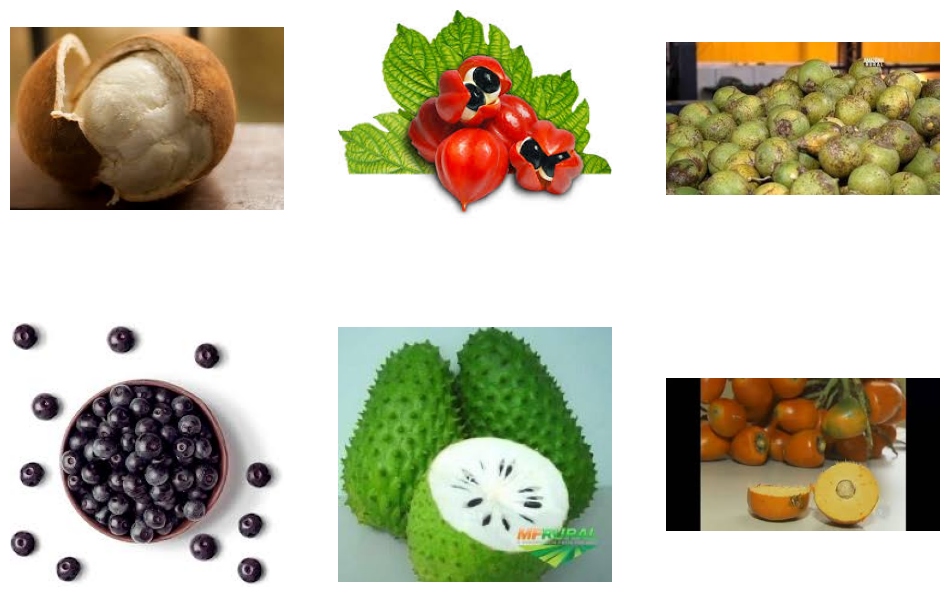

In [ ]:
class_dirs = os.listdir(test_dir)

images = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_path = random.choice(os.listdir(class_path))
    img = Image.open(os.path.join(class_path, image_path))
    images.append(img)

fig, axes = plt.subplots(2, len(images)//2, figsize=(12, 8))
for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
def check_for_corrupted_images(train_dir):
    removed_images = []
    for class_dir in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_dir)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                img = Image.open(image_path)
                img.verify()
            except (IOError, SyntaxError) as e:
                removed_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

    if not removed_images:
        print("No corrupted images found.")

check_for_corrupted_images(train_dir)

No corrupted images found.


In [ ]:
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
def get_num_classes(train_dir):

    class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

    num_classes = len(class_dirs)

    return num_classes

num_classes = get_num_classes(train_dir)

print(f"Number of classes: {num_classes}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()


Number of classes: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,862,502 (7.10 MB)

 Trainable params: 1,862,502 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class as we have more than 2 folders
              metrics=['accuracy'])


In [ ]:
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(monitor='val_loss', patience=4)
]

history = model.fit(
    train_ds,
    epochs=250,
    validation_data=val_ds,
    callbacks=callbacks,
    batch_size=16
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.2442 - loss: 1.8548

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 676ms/step - accuracy: 0.2491 - loss: 1.8595 - val_accuracy: 0.1111 - val_loss: 2.1861
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.2882 - loss: 1.8097

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 718ms/step - accuracy: 0.2995 - loss: 1.7931 - val_accuracy: 0.1111 - val_loss: 1.7943
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4440 - loss: 1.5224 - val_accuracy: 0.1667 - val_loss: 1.9035
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - accuracy: 0.4392 - loss: 1.3550 - val_accuracy: 0.1667 - val_loss: 1.9884
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.5590 - loss: 1.1547

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - accuracy: 0.5651 - loss: 1.1509 - val_accuracy: 0.3333 - val_loss: 1.7696
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - accuracy: 0.7027 - loss: 0.9202 - val_accuracy: 0.1667 - val_loss: 2.6875
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step - accuracy: 0.6840 - loss: 0.8390 - val_accuracy: 0.2778 - val_loss: 1.8657
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step - accuracy: 0.8898 - loss: 0.5975 - val_accuracy: 0.2222 - val_loss: 2.1435
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.8970 - loss: 0.4674

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 777ms/step - accuracy: 0.8845 - loss: 0.4778 - val_accuracy: 0.2222 - val_loss: 1.7182
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.9783 - loss: 0.3424 - val_accuracy: 0.3333 - val_loss: 1.8463
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.9045 - loss: 0.3210 - val_accuracy: 0.2222 - val_loss: 2.5518
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.9596 - loss: 0.2254 - val_accuracy: 0.2778 - val_loss: 2.5660
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 0.9705 - loss: 0.1277 - val_accuracy: 0.2222 - val_loss: 2.4024


In [ ]:


img_height = 128
img_width = 128
batch_size = 32

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)


rescale = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))


test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.9999
Test accuracy: 0.6667


In [ ]:
model.save('cnn_model.h5')

loaded_model = tf.keras.models.load_model('cnn_model.h5')